In [1]:
import requests
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup
import json
import openpyxl
import pandas as pd

api_key = 'b996ed8b-dc1b-4dee-8687-bbb4b26dd313'

url = 'https://geocode-maps.yandex.ru/1.x?geocode='
variants = {'Санкт-Петербург, Разночинная 32' : {}, 
            'Санкт-Петербург, Чкаловский пр 12' : {},
            'Санкт-Петербург, Большая Пушкарская 20' : {},
           }
mc21 = ['СПБ Большой Сампсониевский пр. д. 45 лит А']


def addr(b):
    a = b.replace(' ', '')
    a = str(a.encode('utf8'))
    i = a[2]
    a2 = ''.join(a.split(i))
    a3 = a2.replace('x', '%')
    resp = urlopen(url + a3.upper() + '&apikey=' + api_key + '&format=json')
    rows = resp.read().decode('utf8') # считываем содержимое
    lst = json.loads(rows)
    coords = lst['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos'].split()
    return [coords[1], coords[0]]

# def coords(b):
#     b = '%20'.join(b[::-1])
#     resp = urlopen(url + b + '&apikey=' + key + '&format=json')
#     rows = resp.read().decode('utf8') # считываем содержимое
#     lst = json.loads(rows)
#     return lst




# def coord(a):
#     resp = urlopen(url + a + '&apikey=' + key + '&format=json')
#     rows = resp.read().decode('utf8') # считываем содержимое
#     lst = json.loads(rows)
#     coords = lst['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos'].split()
#     return [coords[1], coords[0]]
#     return 


In [24]:
for i in variants:
    print(i, addr(i))
    print('\n')
    print(coords(addr(i)))

Санкт-Петербург, Разночинная 32 ['59.961998', '30.284283']


{'response': {'GeoObjectCollection': {'metaDataProperty': {'GeocoderResponseMetaData': {'Point': {'pos': '30.284283 59.961998'}, 'request': '30.284283 59.961998', 'results': '10', 'found': '11'}}, 'featureMember': [{'GeoObject': {'metaDataProperty': {'GeocoderMetaData': {'precision': 'exact', 'text': 'Россия, Санкт-Петербург, Большая Разночинная улица, 32', 'kind': 'house', 'Address': {'country_code': 'RU', 'formatted': 'Россия, Санкт-Петербург, Большая Разночинная улица, 32', 'postal_code': '197110', 'Components': [{'kind': 'country', 'name': 'Россия'}, {'kind': 'province', 'name': 'Северо-Западный федеральный округ'}, {'kind': 'province', 'name': 'Санкт-Петербург'}, {'kind': 'locality', 'name': 'Санкт-Петербург'}, {'kind': 'street', 'name': 'Большая Разночинная улица'}, {'kind': 'house', 'name': '32'}]}, 'AddressDetails': {'Country': {'AddressLine': 'Россия, Санкт-Петербург, Большая Разночинная улица, 32', 'CountryNameCode'

{'response': {'GeoObjectCollection': {'metaDataProperty': {'GeocoderResponseMetaData': {'Point': {'pos': '30.288434 59.959895'}, 'request': '30.288434 59.959895', 'results': '10', 'found': '11'}}, 'featureMember': [{'GeoObject': {'metaDataProperty': {'GeocoderMetaData': {'precision': 'exact', 'text': 'Россия, Санкт-Петербург, Чкаловский проспект, 12', 'kind': 'house', 'Address': {'country_code': 'RU', 'formatted': 'Россия, Санкт-Петербург, Чкаловский проспект, 12', 'postal_code': '197110', 'Components': [{'kind': 'country', 'name': 'Россия'}, {'kind': 'province', 'name': 'Северо-Западный федеральный округ'}, {'kind': 'province', 'name': 'Санкт-Петербург'}, {'kind': 'locality', 'name': 'Санкт-Петербург'}, {'kind': 'street', 'name': 'Чкаловский проспект'}, {'kind': 'house', 'name': '12'}]}, 'AddressDetails': {'Country': {'AddressLine': 'Россия, Санкт-Петербург, Чкаловский проспект, 12', 'CountryNameCode': 'RU', 'CountryName': 'Россия', 'AdministrativeArea': {'AdministrativeAreaName': 'Са

Санкт-Петербург, Большая Пушкарская 20 ['59.957827', '30.300848']


{'response': {'GeoObjectCollection': {'metaDataProperty': {'GeocoderResponseMetaData': {'Point': {'pos': '30.300848 59.957827'}, 'request': '30.300848 59.957827', 'results': '10', 'found': '12'}}, 'featureMember': [{'GeoObject': {'metaDataProperty': {'GeocoderMetaData': {'precision': 'exact', 'text': 'Россия, Санкт-Петербург, Большая Пушкарская улица, 20', 'kind': 'house', 'Address': {'country_code': 'RU', 'formatted': 'Россия, Санкт-Петербург, Большая Пушкарская улица, 20', 'postal_code': '197198', 'Components': [{'kind': 'country', 'name': 'Россия'}, {'kind': 'province', 'name': 'Северо-Западный федеральный округ'}, {'kind': 'province', 'name': 'Санкт-Петербург'}, {'kind': 'locality', 'name': 'Санкт-Петербург'}, {'kind': 'street', 'name': 'Большая Пушкарская улица'}, {'kind': 'house', 'name': '20'}]}, 'AddressDetails': {'Country': {'AddressLine': 'Россия, Санкт-Петербург, Большая Пушкарская улица, 20', 'CountryNameCo

In [7]:
# получим все БЦ, скопировал в txt c Яндекса
cnt = 0
set_bc = set()
with open('BC.txt', 'r', encoding='UTF8') as f:
    f = f.readlines()
    for line in f:
        if 'санкт-петербург' in line.lower():
            if line[:line.lower().find('санкт-петербург') - 2] not in set_bc:
                set_bc.add(line[:line.lower().find('санкт-петербург') - 2])
                print(line[:line.lower().find('санкт-петербург') - 2])
                cnt += 1
cnt

ул. Мира, 3
Аптекарская наб., 12
Большой просп. Петроградской стороны, 29АБ
Чкаловский просп., 50
Большой просп. Петроградской стороны, 32
ул. Профессора Попова, 37В
Малый просп. Петроградской стороны, 5Б
ул. Профессора Попова, 47
Большой просп. Петроградской стороны, 18
Большая Разночинная ул., 32
Большая Зеленина ул., 8, корп. 2
ул. Профессора Попова, 37Щ
Пионерская ул., 30
Песочная наб., 42
Большая Пушкарская ул., 22
Чкаловский просп., 15, лит.З
ул. Всеволода Вишневского, 12А
ул. Красного Курсанта, 25Н
Левашовский просп., 15
Большая Пушкарская ул., 35
ул. Профессора Попова, 37Б
Каменноостровский просп., 40
Лахтинская ул., 14
Левашовский просп., 12
ул. Кропоткина, 1
Кронверкская ул., 5
Малый просп. Петроградской стороны, 87
Бармалеева ул., 17
Большая Разночинная ул., 14
Большой просп. Петроградской стороны, 48
Левашовский просп., 13
ул. Красного Курсанта, 25В
Песочная наб., 42, корп. 2
Большой просп. Петроградской стороны, 58
Константиновский просп., 11
ул. Кропоткина, 1И
ул. Красног

52

In [25]:
import pandas as pd

In [26]:
data_obj = pd.read_excel('Объекты_район.xlsx')

In [27]:
data_obj

,Объект,Категория
0,Приморский пар Победы,Парки/Озера
1,ЦПКиО,Парки/Озера
2,Александровский парк,Парки/Озера
3,Парк Тихий Отдых,Парки/Озера
4,Ботанический сад,Парки/Озера
...,...,...
87,"ул. Академика Павлова, 13",Достопримечательность
88,"наб. реки Малой Невки, 1",Достопримечательность
89,"Каменноостровский просп., 77",Достопримечательность
90,"наб. реки Малой Невки, 11",Достопримечательность


In [28]:
lst_obj = []
data_obj
for i in data_obj['Объект']:
    lst_obj.append(addr('Санкт-Петербург '+i))


In [29]:
lst_obj2 = [', '.join([i[0], i[1]]) for i in lst_obj]

In [30]:
lst_obj2

['59.971452, 30.243671',
 '59.979263, 30.258735',
 '59.956043, 30.317494',
 '59.978732, 30.289673',
 '59.969866, 30.325336',
 '59.961016, 30.334751',
 '59.956147, 30.318833',
 '59.971879, 30.211942',
 '59.971591, 30.24756',
 '59.960958, 30.29218',
 '59.968223, 30.270925',
 '59.959012, 30.313523',
 '59.975963, 30.32327',
 '59.958142, 30.300121',
 '59.967358, 30.299339',
 '59.957669, 30.298486',
 '59.972019, 30.298773',
 '59.953813, 30.291066',
 '59.971181, 30.287068',
 '59.955489, 30.295027',
 '59.961998, 30.284283',
 '59.960282, 30.293213',
 '59.971564, 30.299941',
 '59.960043, 30.283277',
 '59.967448, 30.283214',
 '59.958296, 30.302241',
 '59.961908, 30.295324',
 '59.96829, 30.298872',
 '59.961206, 30.280268',
 '59.966746, 30.284706',
 '59.961742, 30.308834',
 '59.971735, 30.298899',
 '59.966255, 30.310694',
 '59.962161, 30.301163',
 '59.965885, 30.292961',
 '59.959228, 30.311655',
 '59.958169, 30.313164',
 '59.966867, 30.308035',
 '59.964813, 30.304828',
 '59.95876, 30.291973',
 '59.

In [31]:
data_obj['Координаты'] = lst_obj2

In [32]:
data_obj

,Объект,Категория,Координаты
0,Приморский пар Победы,Парки/Озера,"59.971452, 30.243671"
1,ЦПКиО,Парки/Озера,"59.979263, 30.258735"
2,Александровский парк,Парки/Озера,"59.956043, 30.317494"
3,Парк Тихий Отдых,Парки/Озера,"59.978732, 30.289673"
4,Ботанический сад,Парки/Озера,"59.969866, 30.325336"
...,...,...,...
87,"ул. Академика Павлова, 13",Достопримечательность,"59.976292, 30.305331"
88,"наб. реки Малой Невки, 1",Достопримечательность,"59.979808, 30.304675"
89,"Каменноостровский просп., 77",Достопримечательность,"59.978656, 30.300758"
90,"наб. реки Малой Невки, 11",Достопримечательность,"59.978039, 30.297704"


In [20]:
data_obj[data_obj['Категория'].isnull()]['Категория'] = ['Парки/Озера', 'Парки/Озера']

C:\Users\AmanovRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
data_obj['Категория'] = data_obj['Категория'].fillna('Парки/Озера')

In [33]:
data_obj.to_excel('coords_dostoprim.xlsx')

In [34]:
data_obj

,Объект,Категория,Координаты
0,Приморский пар Победы,Парки/Озера,"59.971452, 30.243671"
1,ЦПКиО,Парки/Озера,"59.979263, 30.258735"
2,Александровский парк,Парки/Озера,"59.956043, 30.317494"
3,Парк Тихий Отдых,Парки/Озера,"59.978732, 30.289673"
4,Ботанический сад,Парки/Озера,"59.969866, 30.325336"
...,...,...,...
87,"ул. Академика Павлова, 13",Достопримечательность,"59.976292, 30.305331"
88,"наб. реки Малой Невки, 1",Достопримечательность,"59.979808, 30.304675"
89,"Каменноостровский просп., 77",Достопримечательность,"59.978656, 30.300758"
90,"наб. реки Малой Невки, 11",Достопримечательность,"59.978039, 30.297704"


In [35]:
from geopy.distance import geodesic

In [36]:
print(geodesic(data_obj['Координаты'][0], data_obj['Координаты'][1]).meters)

1210.3410711573858


In [38]:
places = {'Санкт-Петербург, Большая Разночинная улица, 32' : '59.961998, 30.284283',
         'Санкт-Петербург, Чкаловский пр 12' : '59.959895, 30.288434',
         'Санкт-Петербург, Большая Пушкарская 20' : '59.957827, 30.300848'}

In [39]:
for key, val in places.items():
    temp_lst = []
    for i in data_obj['Координаты']:
        temp_lst.append(int(geodesic(i, val).meters))
    data_obj[key] = temp_lst    

In [41]:
data_obj.to_excel('coords_dostoprim.xlsx')

In [42]:
group_data_obj = data_obj.groupby('Категория')#.agg{'Санкт-Петербург, ул. Симонова, 1' : ['sum'], 'Санкт-Петербург, просп. Художников, 30К1' : ['sum'], 'Санкт-Петербург, просп. Просвещения, 49' : ['sum']}

In [45]:
group_data_obj.sum().to_excel('group_obj_dostoprim.xlsx')

In [44]:
data_obj.to_excel('coords_dostoprim.xlsx')

In [4]:
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup

In [5]:
xml = open('map.osm', 'r', encoding='utf8').read()
soup = BeautifulSoup(xml, 'xml')

for node in soup.find_all('node'):
    for tag in node('tag'):
        if tag['k'] == 'amenity' and tag['v'] in ('training', 'school', 'kindergarten'):
            for new_tag in node('tag'):
                if new_tag['k'] == 'name':
                    print(new_tag['v'], node['lat'], node['lon'])
                

Ассоциация языковых школ 60.0484471 30.3670723
Детская школа искусств им. Бородина 60.0421639 30.3798084
Alibra School 60.0586701 30.3323365


In [50]:
import os

osm_files = [i for i in os.listdir('.') if '.osm' in i]

osm_files

['map (1).osm', 'map (2).osm', 'map (3).osm', 'map (4).osm']

In [51]:
dct_schools = {}
cnt = 0

for osm in osm_files:
    xml = open(osm, 'r', encoding='utf8').read()
    soup = BeautifulSoup(xml, 'xml')
    for way in soup.find_all('way'):
        for tag in way('tag'):
            if tag['k'] == 'building' and tag['v'] in ('training', 'school', 'kindergarten', 'university'):
                cnt += 1
                tempdict = {'type' : tag['v'],
                           'addr:street' : '',
                           'addr:housenumber' : '',
                           'name' : ''}
                for new_tag in way('tag'):     
                    if new_tag['k'] in tempdict.keys():
                        tempdict[new_tag['k']] = new_tag['v']
                dct_schools.setdefault(cnt, tempdict)        
                    
                    

In [55]:
dct_schools

{1: {'type': 'school',
  'addr:street': 'Крестовский проспект',
  'addr:housenumber': '18',
  'name': ''},
 2: {'type': 'school',
  'addr:street': 'проспект Динамо',
  'addr:housenumber': '14',
  'name': 'Гимназия № 56 (начальные классы)'},
 3: {'type': 'school',
  'addr:street': 'Крестовский проспект',
  'addr:housenumber': '7',
  'name': 'ГБОУ СОШ № 51'},
 4: {'type': 'school',
  'addr:street': 'Константиновский проспект',
  'addr:housenumber': '11А',
  'name': ''},
 5: {'type': 'school',
  'addr:street': 'Константиновский проспект',
  'addr:housenumber': '11',
  'name': ''},
 6: {'type': 'kindergarten',
  'addr:street': 'Константиновский проспект',
  'addr:housenumber': '14-16',
  'name': ''},
 7: {'type': 'kindergarten',
  'addr:street': 'Морской проспект',
  'addr:housenumber': '26',
  'name': ''},
 8: {'type': 'university',
  'addr:street': 'улица Профессора Попова',
  'addr:housenumber': '5 литЩ',
  'name': 'Корпус D'},
 9: {'type': 'university',
  'addr:street': 'улица Профессо

In [59]:
for key1, val1 in dct_schools.items():
    dct_schools[key1]['coords'] = addr('Санкт-Петербург' + dct_schools[key1]['addr:street'] + dct_schools[key1]['addr:housenumber'])

In [62]:
dct_schools

{1: {'type': 'school',
  'addr:street': 'Крестовский проспект',
  'addr:housenumber': '18',
  'name': '',
  'coords': ['59.968727', '30.261053']},
 2: {'type': 'school',
  'addr:street': 'проспект Динамо',
  'addr:housenumber': '14',
  'name': 'Гимназия № 56 (начальные классы)',
  'coords': ['59.968705', '30.274591']},
 3: {'type': 'school',
  'addr:street': 'Крестовский проспект',
  'addr:housenumber': '7',
  'name': 'ГБОУ СОШ № 51',
  'coords': ['59.970078', '30.269892']},
 4: {'type': 'school',
  'addr:street': 'Константиновский проспект',
  'addr:housenumber': '11А',
  'name': '',
  'coords': ['59.972577', '30.273126']},
 5: {'type': 'school',
  'addr:street': 'Константиновский проспект',
  'addr:housenumber': '11',
  'name': '',
  'coords': ['59.972627', '30.271644']},
 6: {'type': 'kindergarten',
  'addr:street': 'Константиновский проспект',
  'addr:housenumber': '14-16',
  'name': '',
  'coords': ['59.971933', '30.270791']},
 7: {'type': 'kindergarten',
  'addr:street': 'Морской

In [15]:
dct_schools[74] = {'type' : 'school',
                       'addr:street' : '',
                       'addr:housenumber' : '',
                       'name' : 'Ассоциация языковых школ',
                  'coords': ['60.0484471', '30.3670723']}
dct_schools[75] = {'type' : 'school',
                       'addr:street' : '',
                       'addr:housenumber' : '',
                       'name' : 'Детская школа искусств им. Бородина',
                  'coords': ['60.0421639', '30.3798084']}

dct_schools[76] = {'type' : 'school',
                       'addr:street' : '',
                       'addr:housenumber' : '',
                       'name' : 'Alibra School',
                  'coords': ['60.0586701', '30.3323365']}



In [16]:
dct_schools

{1: {'type': 'school',
  'addr:street': 'улица Демьяна Бедного',
  'addr:housenumber': '21',
  'name': 'Профессиональный лицей Метростроя',
  'coords': ['60.045947', '30.390833']},
 2: {'type': 'kindergarten',
  'addr:street': 'улица Демьяна Бедного',
  'addr:housenumber': '22 к4',
  'name': 'Детский сад № 55',
  'coords': ['60.044927', '30.386539']},
 3: {'type': 'school',
  'addr:street': 'улица Демьяна Бедного',
  'addr:housenumber': '22 к5',
  'name': '',
  'coords': ['60.044819', '30.384724']},
 4: {'type': 'kindergarten',
  'addr:street': 'Сиреневый бульвар',
  'addr:housenumber': '7 к3',
  'name': '',
  'coords': ['60.052339', '30.351702']},
 5: {'type': 'kindergarten',
  'addr:street': 'Сиреневый бульвар',
  'addr:housenumber': '7 к2',
  'name': '',
  'coords': ['60.052631', '30.353157']},
 6: {'type': 'kindergarten',
  'addr:street': 'улица Руднева',
  'addr:housenumber': '8 к1',
  'name': '',
  'coords': ['60.040236', '30.359463']},
 7: {'type': 'school',
  'addr:street': 'ул

In [63]:


for key, val in dct_schools.items():
    dct_schools[key]['coords'] = ', '.join(dct_schools[key]['coords'])

In [64]:
dct_schools

{1: {'type': 'school',
  'addr:street': 'Крестовский проспект',
  'addr:housenumber': '18',
  'name': '',
  'coords': '59.968727, 30.261053'},
 2: {'type': 'school',
  'addr:street': 'проспект Динамо',
  'addr:housenumber': '14',
  'name': 'Гимназия № 56 (начальные классы)',
  'coords': '59.968705, 30.274591'},
 3: {'type': 'school',
  'addr:street': 'Крестовский проспект',
  'addr:housenumber': '7',
  'name': 'ГБОУ СОШ № 51',
  'coords': '59.970078, 30.269892'},
 4: {'type': 'school',
  'addr:street': 'Константиновский проспект',
  'addr:housenumber': '11А',
  'name': '',
  'coords': '59.972577, 30.273126'},
 5: {'type': 'school',
  'addr:street': 'Константиновский проспект',
  'addr:housenumber': '11',
  'name': '',
  'coords': '59.972627, 30.271644'},
 6: {'type': 'kindergarten',
  'addr:street': 'Константиновский проспект',
  'addr:housenumber': '14-16',
  'name': '',
  'coords': '59.971933, 30.270791'},
 7: {'type': 'kindergarten',
  'addr:street': 'Морской проспект',
  'addr:hous

In [65]:
dct_schools2 = {'type' : [],
               'name' : [],
               'coords' : []}

for key, val in dct_schools.items():
    dct_schools2['type'].append(dct_schools[key]['type'])
    if dct_schools[key]['name'] != '':
        dct_schools2['name'].append(dct_schools[key]['name'])
    else:
        dct_schools2['name'].append(dct_schools[key]['addr:street'] + ' ' + dct_schools[key]['addr:housenumber'])
    dct_schools2['coords'].append(dct_schools[key]['coords'])  

In [66]:
data_schools = pd.DataFrame(dct_schools2)

In [67]:
data_schools

,type,name,coords
0,school,Крестовский проспект 18,"59.968727, 30.261053"
1,school,Гимназия № 56 (начальные классы),"59.968705, 30.274591"
2,school,ГБОУ СОШ № 51,"59.970078, 30.269892"
3,school,Константиновский проспект 11А,"59.972577, 30.273126"
4,school,Константиновский проспект 11,"59.972627, 30.271644"
...,...,...,...
87,school,Большая Посадская улица 16,"59.959498, 30.325803"
88,university,улица Льва Толстого 19,"59.96448, 30.321429"
89,kindergarten,Петровский проспект 10А,"59.956913, 30.275013"
90,kindergarten,Петровский проспект 12А,"59.95698, 30.273027"


In [68]:
places = {'Санкт-Петербург, Большая Разночинная улица, 32' : '59.961998, 30.284283',
         'Санкт-Петербург, Чкаловский пр 12' : '59.959895, 30.288434',
         'Санкт-Петербург, Большая Пушкарская 20' : '59.957827, 30.300848'}

for key, val in places.items():
    temp_lst = []
    for i in data_schools['coords']:
        temp_lst.append(int(geodesic(i, val).meters))
    data_schools[key] = temp_lst    

In [69]:
data_schools.columns = ['Тип', 'Наименование/Адрес', "Координаты", 'Расстояние до Санкт-Петербург, Большая Разночинная улица, 32', 'Расстояние до Санкт-Петербург, Чкаловский пр 12', 'Расстояние до Санкт-Петербург, Большая Пушкарская 20']

In [70]:
data_schools.to_excel('schools.xlsx')

In [94]:
import os

osm_files = [i for i in os.listdir('.') if '.osm' in i]

for osm in osm_files:
    xml = open(osm, 'r', encoding='utf8').read()
    soup = BeautifulSoup(xml, 'xml')
    for node in soup.find_all('node'):
        for tag in node('tag'):
            if tag['k'] in ('healthcare', 'amenity') and tag['v'] in ('doctor', 'doctors'):
                for new_tag in node('tag'):
                    if new_tag['k'] == 'name':
                        print(new_tag['v'],'|' ,node['lat'],', ' ,node['lon'], sep='')
                        break

# dct_policlinic = {}
# cnt = 0
# for osm in osm_files:
#     xml = open(osm, 'r', encoding='utf8').read()
#     soup = BeautifulSoup(xml, 'xml')
#     for way in soup.find_all('way'):
#         for tag in way('tag'):
#             if tag['k'] in ('healthcare', 'amenity') and tag['v'] in ('doctor', 'doctors'):
#                 cnt += 1
#                 tempdict = {'type' : tag['v'],
#                            'addr:street' : '',
#                            'addr:housenumber' : '',
#                            'name' : ''}
#                 for new_tag in way('tag'):     
#                     if new_tag['k'] in tempdict.keys():
#                         tempdict[new_tag['k']] = new_tag['v']
#                 dct_policlinic.setdefault(cnt, tempdict)
#                 break
                    

Медпункт|59.9803400, 30.2635283
Медпункт|59.9803400, 30.2635283
Ан-Фарм|59.9692590, 30.2601322
Ан-Фарм|59.9692590, 30.2601322
Женская консультация|59.9686319, 30.3084409
Женская консультация|59.9686319, 30.3084409
АндроМеда|59.9685342, 30.3048313
АндроМеда|59.9685342, 30.3048313
Эстетик Клуб|59.9692661, 30.3069078
Поликлиника №31|59.9660244, 30.3179044
Поликлиника №31|59.9660244, 30.3179044
МЭДИС|59.9661104, 30.3142967
МЭДИС|59.9661104, 30.3142967
Хеликс|59.9680952, 30.3165324
Хеликс|59.9680952, 30.3165324
Хеликс|59.9667038, 30.3101622
Хеликс|59.9667038, 30.3101622
Здоровье+|59.9588683, 30.3029462
Здоровье+|59.9588683, 30.3029462
Венера|59.9579108, 30.3014244
Венера|59.9579108, 30.3014244
Ортолюкс|59.9615381, 30.3066461
Ортолюкс|59.9615381, 30.3066461
Анталгический центр|59.9515987, 30.3010646
Анталгический центр|59.9515987, 30.3010646
Инвитро|59.9509697, 30.2969461
Инвитро|59.9509697, 30.2969461
GoodMeD|59.9534331, 30.2943159
GoodMeD|59.9534331, 30.2943159
BeautyMed|59.9522627, 30.305

In [74]:
from pprint import pprint

pprint(dct_policlinic)

{1: {'addr:housenumber': '',
     'addr:street': '',
     'name': 'НИИ Пульмонологии',
     'type': 'doctors'},
 2: {'addr:housenumber': '3',
     'addr:street': 'Вяземский переулок',
     'name': 'Поликлиника №32',
     'type': 'doctors'},
 3: {'addr:housenumber': '48',
     'addr:street': 'Каменноостровский проспект',
     'name': 'Межрайонный врачебно-физкультурный диспансер №1',
     'type': 'doctors'},
 4: {'addr:housenumber': '',
     'addr:street': '',
     'name': 'Травматология',
     'type': 'doctors'},
 5: {'addr:housenumber': '25',
     'addr:street': 'улица Куйбышева',
     'name': 'Детская поликлиника №19',
     'type': 'doctors'}}


In [11]:
dct_policlinic

{1: {'type': 'doctors',
  'addr:street': 'улица Кустодиева',
  'addr:housenumber': '6 к1',
  'name': 'Поликлиника №97'},
 2: {'type': 'doctors',
  'addr:street': 'улица Кустодиева',
  'addr:housenumber': '8',
  'name': 'Детская поликлиника №7'},
 3: {'type': 'doctors',
  'addr:street': 'улица Есенина',
  'addr:housenumber': '38 к1',
  'name': 'Поликлиника №99'},
 4: {'type': 'doctors',
  'addr:street': 'улица Есенина',
  'addr:housenumber': '38 к2',
  'name': 'Детская поликлиника №17'},
 5: {'type': 'doctors',
  'addr:street': 'проспект Просвещения',
  'addr:housenumber': '53 к2',
  'name': 'Поликлиника № 96'},
 6: {'type': 'doctors',
  'addr:street': 'улица Демьяна Бедного',
  'addr:housenumber': '18 к3',
  'name': 'Детская поликлиника № 29'},
 7: {'type': 'doctors',
  'addr:street': 'проспект Энгельса',
  'addr:housenumber': '147 к1',
  'name': 'Детская городская поликлиника №7'},
 8: {'type': 'doctors',
  'addr:street': 'проспект Энгельса',
  'addr:housenumber': '117',
  'name': 'Де

In [77]:
for key1, val1 in dct_policlinic.items():
    dct_policlinic[key1]['coords'] = addr('Санкт-Петербург' + dct_policlinic[key1]['addr:street'] + dct_policlinic[key1]['addr:housenumber'])

In [83]:
dct_policlinic

{1: {'type': 'doctors',
  'addr:street': '',
  'addr:housenumber': '',
  'name': 'НИИ Пульмонологии',
  'coords': '59.938951, 30.315635'},
 2: {'type': 'doctors',
  'addr:street': 'Вяземский переулок',
  'addr:housenumber': '3',
  'name': 'Поликлиника №32',
  'coords': '59.971821, 30.303004'},
 3: {'type': 'doctors',
  'addr:street': 'Каменноостровский проспект',
  'addr:housenumber': '48',
  'name': 'Межрайонный врачебно-физкультурный диспансер №1',
  'coords': '59.970227, 30.30693'},
 4: {'type': 'doctors',
  'addr:street': '',
  'addr:housenumber': '',
  'name': 'Травматология',
  'coords': '59.938951, 30.315635'},
 5: {'type': 'doctors',
  'addr:street': 'улица Куйбышева',
  'addr:housenumber': '25',
  'name': 'Детская поликлиника №19',
  'coords': '59.956723, 30.331858'}}

In [79]:
for key, val in dct_policlinic.items():
    dct_policlinic[key]['coords'] = ', '.join(dct_policlinic[key]['coords'])

In [80]:
dct_policlinic

{1: {'type': 'doctors',
  'addr:street': '',
  'addr:housenumber': '',
  'name': 'НИИ Пульмонологии',
  'coords': '59.938951, 30.315635'},
 2: {'type': 'doctors',
  'addr:street': 'Вяземский переулок',
  'addr:housenumber': '3',
  'name': 'Поликлиника №32',
  'coords': '59.971821, 30.303004'},
 3: {'type': 'doctors',
  'addr:street': 'Каменноостровский проспект',
  'addr:housenumber': '48',
  'name': 'Межрайонный врачебно-физкультурный диспансер №1',
  'coords': '59.970227, 30.30693'},
 4: {'type': 'doctors',
  'addr:street': '',
  'addr:housenumber': '',
  'name': 'Травматология',
  'coords': '59.938951, 30.315635'},
 5: {'type': 'doctors',
  'addr:street': 'улица Куйбышева',
  'addr:housenumber': '25',
  'name': 'Детская поликлиника №19',
  'coords': '59.956723, 30.331858'}}

In [81]:
dct_policlinic2 = {'type' : [],
               'name' : [],
               'coords' : []}

for key, val in dct_policlinic.items():
    dct_policlinic2['type'].append(dct_policlinic[key]['type'])
    if dct_policlinic[key]['name'] != '':
        dct_policlinic2['name'].append(dct_policlinic[key]['name'])
    else:
        dct_policlinic2['name'].append(dct_policlinic[key]['addr:street'] + ' ' + dct_policlinic[key]['addr:housenumber'])
    dct_policlinic2['coords'].append(dct_policlinic[key]['coords'])  

In [84]:
dct_policlinic2

{'type': ['doctors', 'doctors', 'doctors', 'doctors', 'doctors'],
 'name': ['НИИ Пульмонологии',
  'Поликлиника №32',
  'Межрайонный врачебно-физкультурный диспансер №1',
  'Травматология',
  'Детская поликлиника №19'],
 'coords': ['59.938951, 30.315635',
  '59.971821, 30.303004',
  '59.970227, 30.30693',
  '59.938951, 30.315635',
  '59.956723, 30.331858']}

In [85]:
clinics = pd.read_excel(r'C:\Users\AmanovRA\Anaconda3\Work-work\Choice_place\Place_Petroga_analysis\Клиники.xlsx')

clinics['coords'] = clinics['Адрес'].apply(lambda x: addr('Санкт-Петербург' + x))

In [86]:
clinics['coords2'] = clinics['coords'].apply(lambda x: ', '.join(x))

In [87]:
clinics.drop('coords', axis=1, inplace=True)

In [88]:
del dct_policlinic2['type']
dct_policlinic2

{'name': ['НИИ Пульмонологии',
  'Поликлиника №32',
  'Межрайонный врачебно-физкультурный диспансер №1',
  'Травматология',
  'Детская поликлиника №19'],
 'coords': ['59.938951, 30.315635',
  '59.971821, 30.303004',
  '59.970227, 30.30693',
  '59.938951, 30.315635',
  '59.956723, 30.331858']}

In [89]:
dct_policlinic2['name'].extend(clinics['Клиника'].to_list())
dct_policlinic2['coords'].extend(clinics['coords2'].to_list())

In [92]:
pd.DataFrame(dct_policlinic2).to_excel('Клиники_временно.xlsx')

In [116]:
data_edit_clinic = pd.read_excel('Клиники_временно.xlsx', sheet_name="Sheet1")

In [114]:
data_edit_clinic.drop('Уник_клиент_разрез_sdfsdf', inplace=True, axis=1)

In [121]:

data_edit_clinic.columns = ['Клиника', 'Координаты']

### В eXCEL посоединял там клиники эти


In [122]:
places = {'Санкт-Петербург, Большая Разночинная улица, 32' : '59.961998, 30.284283',
         'Санкт-Петербург, Чкаловский пр 12' : '59.959895, 30.288434',
         'Санкт-Петербург, Большая Пушкарская 20' : '59.957827, 30.300848'}


for key, val in places.items():
    temp_lst = []
    for i in data_edit_clinic['Координаты']:
        temp_lst.append(int(geodesic(i, val).meters))
    data_edit_clinic[key] = temp_lst  

In [123]:
data_edit_clinic.to_excel('Клиники в анализ.xlsx')

In [41]:
data_clinic.to_excel('Расстояние_до_клиник.xlsx')

In [47]:
mc21 = {'Санкт-Петербург ул. В.Гаврилина 11к.1' : '',
'Санкт-Петербург улица Щербакова д.11' : '',
'Санкт-Петербург ул. Сикейроса, 7, корп.2' : '',
'Санкт-Петербург улица Брянцева 13к1' : ''}

for i in mc21:
    mc21[i] = addr(i)



In [49]:
for i, j in mc21.items():
    mc21[i] = ', '.join(j)
    
mc21    

{'Санкт-Петербург ул. В.Гаврилина 11к.1': '60.078666, 30.33714',
 'Санкт-Петербург улица Щербакова д.11': '60.028631, 30.296581',
 'Санкт-Петербург ул. Сикейроса, 7, корп.2': '60.033481, 30.327735',
 'Санкт-Петербург улица Брянцева 13к1': '60.039768, 30.407505'}

In [54]:
data_mc = pd.DataFrame()

for key, val in places.items():
    keys = []
    temp_lst = []
    for key1, val1 in mc21.items():
        temp_lst.append(int(geodesic(val1, val).meters))
        keys.append(key1)
    data_mc[key] = temp_lst
data_mc.index = keys

In [56]:
data_mc.to_excel('Расстояние_до_наших_МЦ.xlsx')

In [57]:
data_dostavka = pd.read_excel(r'R:\AmanovRA\БДВУ_районы.xlsx')

In [59]:
def get_addr(x):
    try:
        addr(x)
    except:
        return ''

In [82]:
data_dostavka['coords'] = data_dostavka['Адрес проживания'].apply(lambda y: get_addr(y))

In [85]:
data_dostavka['Адрес проживания']

0        СПб, пр-кт Просвещения 70-1-117
1                  СПб, ул Лужская 16-82
2         СПб, пр-кт Комендантский 9-104
3                 СПб, ул Руставели 4-42
4         СПб, ул Стародеревенская 18-65
                      ...               
7289           СПб, ул Гжатская 22-3-492
7290    СПб, пр-кт Просвещения 43-1-1515
7291           СПб, ул Гжатская 22-1-256
7292      СПб, пр-кт Просвещения 64-2-89
7293         СПб, пр-кт Ярославский 78-6
Name: Адрес проживания, Length: 7294, dtype: object

In [97]:
data_coords = list()
for i in data_dostavka['Адрес проживания']:
    try:
        data_coords.append(addr(i))
    except:
        data_coords.append('')

In [99]:
data_dostavka['coords'] = data_coords

In [102]:
data_dostavka.to_excel('data_dostavka_vyborgsk.xlsx')

In [103]:
data_dostavka

,Номер карты,Пациент,Телефон,Max([Дата последнего посещения Пациента]),АВ_Район1,АВ_Район2,АВ_Населенный пункт,Адрес проживания,coords
0,61,Кольцова Любовь Владимировна,900-15-37 основной; р/т 321-61-61; 89219001537,2020-03-16,NaN,Выборгский,NaN,"СПб, пр-кт Просвещения 70-1-117","[60.044154, 30.381975]"
1,253,Красильникова Антонина Федоровна,"8(921) 751 03 88 ,88125904384!!!, 974-39-07д.Е...",2020-02-27,NaN,Калининский,NaN,"СПб, ул Лужская 16-82","[60.027404, 30.428661]"
2,346,Карасев Михаил Валентинович,"394-96-26, 8921-967-87-79,р.321-61-71(61) звон...",2020-02-13,NaN,Приморский,NaN,"СПб, пр-кт Комендантский 9-104","[60.005545, 30.263164]"
3,350,Чайка Елена Борисовна,+7(964)-378-52-46,2020-02-03,NaN,Калининский,NaN,"СПб, ул Руставели 4-42","[59.998261, 30.436206]"
4,369,Зуев Николай Геннадиевич,8926 228 44 34,2020-05-13,NaN,Приморский,NaN,"СПб, ул Стародеревенская 18-65","[59.999044, 30.243392]"
...,...,...,...,...,...,...,...,...,...
7289,990502332,Полякова Виктория Александровна,+7(965)037-61-28,2020-05-20,NaN,Калининский,NaN,"СПб, ул Гжатская 22-3-492","[60.012543, 30.387635]"
7290,990503265,Шлык Надежда Андреевна,", +7(911)273-66-74 Елена Ивановна",2020-05-17,NaN,Выборгский,NaN,"СПб, пр-кт Просвещения 43-1-1515","[60.046203, 30.363084]"
7291,990503451,Махт Елена Артёмовна,8-921-978-20-54,2020-06-12,NaN,Калининский,NaN,"СПб, ул Гжатская 22-1-256","[60.011725, 30.388488]"
7292,990503467,Шувалов Алексей Константинович,", +7(952)221-79-15",2020-06-16,NaN,Выборгский,NaN,"СПб, пр-кт Просвещения 64-2-89","[60.04729, 30.370872]"


# ВУ

In [3]:
import pandas as pd
vu_petroga = pd.read_excel(r'C:\Users\AmanovRA\Anaconda3\Work-work\Choice_place\Place_Petroga_analysis\ВУ_2019-2020.xlsx')

In [12]:
data_coords = list()
for i in vu_petroga['Адрес проживания']:
    try:
        data_coords.append(addr(i))
    except:
        data_coords.append('')
        
vu_petroga['coords'] = data_coords        

In [13]:
def join_list(lst):
    return ', '.join([str(i) for i in lst])

vu_petroga['coords'] = vu_petroga['coords'].apply(join_list)

In [16]:
vu_petroga.to_excel('VU_petroga.xlsx')

In [4]:
petroga = pd.read_excel(r'C:\Users\AmanovRA\Anaconda3\Work-work\Choice_place\Place_Petroga_analysis\VU_Petrogradksya.xlsx', index_col=0)
petroga

,Номер карты,Пациент,Телефон,Max([Дата последнего посещения Пациента]),АВ_Район1,АВ_Район2,АВ_Населенный пункт,Адрес проживания,АВ_Улица,coords
0,82,Карелина Юлия Андреевна,",8 921 955 24 83-Юля",2020-03-13,NaN,Петроградский,NaN,"СПб, ул Съезжинская 29-9-11",ул Съезжинская,"59.953984, 30.302672"
1,613,Макарова Римма Павловна,"+7921-445-27-89 звонить на этот !!!, 7-911-840...",2020-01-04,NaN,Петроградский,NaN,"СПб, ул Большая Разночинная 19-24",ул Большая Разночинная,"59.960548, 30.288658"
2,703,Григорьев Владимир Иванович,5942265 моб 949-73-21,2019-03-18,NaN,NaN,NaN,"СПб, пр-кт Просвещения 53-1-808",пр-кт Алексеевский,"60.042923, 30.380843"
3,1524,Сергеев Егор Дмитриевич,+7(921) 963-76-44,2020-03-06,NaN,Петроградский,NaN,"СПб, ул Мира 10-12",ул Мира,"59.959949, 30.316227"
4,1640,Гай Владимир Александрович,"2746026, 9335399 921-933-53-99!!",2019-12-12,NaN,NaN,NaN,"СПб, ул Орловская 1-152",ул Хвойная,"59.951731, 30.390096"
...,...,...,...,...,...,...,...,...,...,...
2456,990496798,Студеникин Андрей Сергеевич,8-931-282-87-25,2020-03-04,NaN,Петроградский,NaN,"СПб, ул Маркина 16-А-14",ул Маркина,"59.956111, 30.306633"
2457,990497574,Лукина Нина Михайловна,+7(981)120-32-65,2020-05-15,NaN,Петроградский,NaN,"СПб, ул Ленина 52-25",ул Ленина,"59.965566, 30.295279"
2458,990503656,Демидов Александр Николаевич,", +7(929)571-43-61",2020-06-11,NaN,NaN,NaN,"СПб, пр-кт Ленинский 64-1-406",пр-кт Ленинский,"59.864096, 30.170808"
2459,990503946,Карелина София Константиновна,", +7(921)955-24-83",2020-06-29,NaN,Петроградский,NaN,"СПб, ул Л Чайкиной 21-14",ул Л Чайкиной,"59.954894, 30.303633"


In [11]:
def information_from_coords(b):
    api_key = 'b996ed8b-dc1b-4dee-8687-bbb4b26dd313'
    url = 'https://geocode-maps.yandex.ru/1.x?geocode='
    b = ','.join([str(i) for i in b.split(', ')[::-1]])
    resp = urlopen(url + b + '&apikey=' + api_key)
    rows = resp.read().decode('utf8') # считываем содержимое
    return rows

In [22]:
xml = information_from_coords(petroga.coords[1])

In [23]:
import re
pattern = r'муниципальный округ (.+?)<'
re.search(pattern, xml, re.I).group(1)

'Чкаловское'

In [26]:
mo = []
for coord in petroga.coords:
    try:
        mo.append(re.search(pattern, information_from_coords(coord), re.I))
    except:
        mo.append('')
    

In [31]:
for i,j in enumerate(mo):
    try:
        mo[i] = j.group(1)
    except:
        continue

In [33]:
for i,j in enumerate(mo):
    try:
        j = j.split(',')
        mo[i] = j[0]
    except:
        continue

In [35]:
petroga['mo'] = mo

In [38]:
petroga.to_excel('VU_Petrogradksya.xlsx')

In [49]:
petroga = petroga.dropna(subset=['coords'])

In [50]:
petroga

,Номер карты,Пациент,Телефон,Max([Дата последнего посещения Пациента]),АВ_Район1,АВ_Район2,АВ_Населенный пункт,Адрес проживания,АВ_Улица,coords,mo
0,82,Карелина Юлия Андреевна,",8 921 955 24 83-Юля",2020-03-13,NaN,Петроградский,NaN,"СПб, ул Съезжинская 29-9-11",ул Съезжинская,"59.953984, 30.302672",Введенский
1,613,Макарова Римма Павловна,"+7921-445-27-89 звонить на этот !!!, 7-911-840...",2020-01-04,NaN,Петроградский,NaN,"СПб, ул Большая Разночинная 19-24",ул Большая Разночинная,"59.960548, 30.288658",Чкаловское
2,703,Григорьев Владимир Иванович,5942265 моб 949-73-21,2019-03-18,NaN,NaN,NaN,"СПб, пр-кт Просвещения 53-1-808",пр-кт Алексеевский,"60.042923, 30.380843",Северный
3,1524,Сергеев Егор Дмитриевич,+7(921) 963-76-44,2020-03-06,NaN,Петроградский,NaN,"СПб, ул Мира 10-12",ул Мира,"59.959949, 30.316227",Кронверкское
4,1640,Гай Владимир Александрович,"2746026, 9335399 921-933-53-99!!",2019-12-12,NaN,NaN,NaN,"СПб, ул Орловская 1-152",ул Хвойная,"59.951731, 30.390096",Смольнинское
...,...,...,...,...,...,...,...,...,...,...,...
2456,990496798,Студеникин Андрей Сергеевич,8-931-282-87-25,2020-03-04,NaN,Петроградский,NaN,"СПб, ул Маркина 16-А-14",ул Маркина,"59.956111, 30.306633",Кронверкское
2457,990497574,Лукина Нина Михайловна,+7(981)120-32-65,2020-05-15,NaN,Петроградский,NaN,"СПб, ул Ленина 52-25",ул Ленина,"59.965566, 30.295279",Чкаловское
2458,990503656,Демидов Александр Николаевич,", +7(929)571-43-61",2020-06-11,NaN,NaN,NaN,"СПб, пр-кт Ленинский 64-1-406",пр-кт Ленинский,"59.864096, 30.170808",Южно-Приморский
2459,990503946,Карелина София Константиновна,", +7(921)955-24-83",2020-06-29,NaN,Петроградский,NaN,"СПб, ул Л Чайкиной 21-14",ул Л Чайкиной,"59.954894, 30.303633",Введенский


In [51]:
pushka = '59.957827, 30.300848'

In [53]:
from geopy.distance import geodesic

distance_to_pushka = []
for i in petroga['coords']:
    distance_to_pushka.append(geodesic(i, pushka).meters)



In [55]:
petroga['Расстояние_до_Большой_Пушкарской'] = distance_to_pushka

C:\Users\AmanovRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
petroga

,Номер карты,Пациент,Телефон,Max([Дата последнего посещения Пациента]),АВ_Район1,АВ_Район2,АВ_Населенный пункт,Адрес проживания,АВ_Улица,coords,mo,Расстояние_до_Большой_Пушкарской
0,82,Карелина Юлия Андреевна,",8 921 955 24 83-Юля",2020-03-13,NaN,Петроградский,NaN,"СПб, ул Съезжинская 29-9-11",ул Съезжинская,"59.953984, 30.302672",Введенский,440.116914
1,613,Макарова Римма Павловна,"+7921-445-27-89 звонить на этот !!!, 7-911-840...",2020-01-04,NaN,Петроградский,NaN,"СПб, ул Большая Разночинная 19-24",ул Большая Разночинная,"59.960548, 30.288658",Чкаловское,745.463269
2,703,Григорьев Владимир Иванович,5942265 моб 949-73-21,2019-03-18,NaN,NaN,NaN,"СПб, пр-кт Просвещения 53-1-808",пр-кт Алексеевский,"60.042923, 30.380843",Северный,10478.967388
3,1524,Сергеев Егор Дмитриевич,+7(921) 963-76-44,2020-03-06,NaN,Петроградский,NaN,"СПб, ул Мира 10-12",ул Мира,"59.959949, 30.316227",Кронверкское,891.144624
4,1640,Гай Владимир Александрович,"2746026, 9335399 921-933-53-99!!",2019-12-12,NaN,NaN,NaN,"СПб, ул Орловская 1-152",ул Хвойная,"59.951731, 30.390096",Смольнинское,5032.868739
...,...,...,...,...,...,...,...,...,...,...,...,...
2456,990496798,Студеникин Андрей Сергеевич,8-931-282-87-25,2020-03-04,NaN,Петроградский,NaN,"СПб, ул Маркина 16-А-14",ул Маркина,"59.956111, 30.306633",Кронверкское,375.530537
2457,990497574,Лукина Нина Михайловна,+7(981)120-32-65,2020-05-15,NaN,Петроградский,NaN,"СПб, ул Ленина 52-25",ул Ленина,"59.965566, 30.295279",Чкаловское,916.625953
2458,990503656,Демидов Александр Николаевич,", +7(929)571-43-61",2020-06-11,NaN,NaN,NaN,"СПб, пр-кт Ленинский 64-1-406",пр-кт Ленинский,"59.864096, 30.170808",Южно-Приморский,12727.324377
2459,990503946,Карелина София Константиновна,", +7(921)955-24-83",2020-06-29,NaN,Петроградский,NaN,"СПб, ул Л Чайкиной 21-14",ул Л Чайкиной,"59.954894, 30.303633",Введенский,361.928732


In [59]:
pt = '''Чкаловское
Петровский
Аптекарский Остров
Посадский
Кронверкское
Введенский'''.split('\n')


In [60]:
petroga_mo = petroga[petroga.mo.isin(pt)]

In [62]:
group_distance = petroga_mo.groupby('mo').agg({'Расстояние_до_Большой_Пушкарской' : 'mean'})

In [64]:
group_distance.to_excel('mo_distance.xlsx')

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

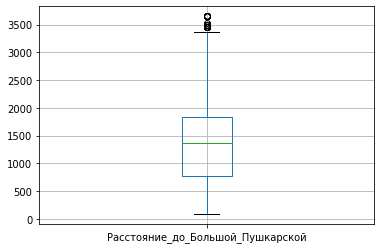

In [74]:
petroga_mo['Расстояние_до_Большой_Пушкарской'].plot(kind='box', grid=True)

In [70]:
import numpy as np
import pandas as pd
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [85]:
detect_outlier(petroga_mo['Расстояние_до_Большой_Пушкарской'])

[24590.536533868744,
 24632.42210658769,
 30744.301237013216,
 27017.707437626053,
 33859.83645152111,
 24380.326802426887,
 25014.188219619642,
 25762.325097178375,
 24380.326802426887,
 28125.50945082085,
 21099.853872509044,
 21099.853872509044,
 24885.98702174592,
 27740.139435682137,
 30413.083104641242,
 19035.852490811725,
 26424.519608237464,
 23986.388888780475,
 30331.34827942411,
 24851.427431389944,
 30639.906092563186,
 26246.246362909606,
 33555.15235084736,
 24896.47141658646,
 30413.083104641242,
 21444.66146457133,
 24087.02765409486,
 21066.983819484944,
 20347.9291586515,
 29472.508733575378,
 27017.707437626053,
 3647.047877026369,
 3647.047877026369,
 3647.047877026369,
 3647.047877026369,
 3647.047877026369,
 3647.047877026369,
 3647.047877026369,
 3647.047877026369,
 3647.047877026369,
 3647.047877026369,
 3647.047877026369,
 3647.047877026369,
 3647.047877026369,
 3647.047877026369,
 3647.047877026369,
 3647.047877026369]

In [76]:
petroga_mo = petroga_mo.sort_values('Расстояние_до_Большой_Пушкарской', ascending=False)
petroga_mo

,Номер карты,Пациент,Телефон,Max([Дата последнего посещения Пациента]),АВ_Район1,АВ_Район2,АВ_Населенный пункт,Адрес проживания,АВ_Улица,coords,mo,Расстояние_до_Большой_Пушкарской
239,152054,Парнова Римма Германовна,9137676,2020-02-29,NaN,Петроградский,NaN,"СПб, наб Мартынова 74-104",наб Мартынова,"59.975936, 30.246455",Чкаловское,3647.047877
881,100143757,Салбиева Диана Эдуардовна,", +7(931)330-89-25",2019-10-24,NaN,Петроградский,NaN,"СПб, наб Мартынова 74-78",наб Мартынова,"59.975936, 30.246455",Чкаловское,3647.047877
643,100095343,Зубарев Алексей Сергеевич,", +7(911)924-92-51",2019-05-21,NaN,Петроградский,NaN,"СПб, наб Мартынова 74-В-78",наб Мартынова,"59.975936, 30.246455",Чкаловское,3647.047877
147,101779,Репинский Егор Денисович,8-921-794-66-81м,2020-01-22,NaN,Петроградский,NaN,"СПб, наб Мартынова 74-К-43",наб Мартынова,"59.975936, 30.246455",Чкаловское,3647.047877
286,183743,Кудряшова Елена Игоревна,89219002525,2019-09-25,NaN,Петроградский,NaN,"СПб, наб Мартынова 74-106",наб Мартынова,"59.975936, 30.246455",Чкаловское,3647.047877
...,...,...,...,...,...,...,...,...,...,...,...,...
1847,120486322,Колесников Владимир Николаевич,", +7(921)974-90-72",2020-03-24,NaN,Петроградский,NaN,"СПб, ул Большая Пушкарская 15-34",ул Большая Пушкарская,"59.957859, 30.302636",Кронверкское,99.960907
792,100129082,Межонов Дмитрий Юрьевич,", +7(911)920-33-99",2019-08-13,NaN,Петроградский,NaN,"СПб, пр-кт Большой ПС 38-40",пр-кт Большой ПС,"59.958548, 30.299842",Петровский,98.038863
2083,120565679,Тулупников Владимир Александрович,", +7(906)730-17-58",2019-01-12,NaN,Петроградский,NaN,"СПб, пр-кт Большой ПС 31-98",пр-кт Большой ПС,"59.958679, 30.300902",Кронверкское,94.970598
1947,120526561,Маслова Тамара Григорьевна,", +7(911)997-75-42",2020-03-26,NaN,Петроградский,NaN,"СПб, пр-кт Большой ПС 31-76",пр-кт Большой ПС,"59.958679, 30.300902",Кронверкское,94.970598


In [79]:
dataset = petroga_mo.sort_values('Расстояние_до_Большой_Пушкарской')['Расстояние_до_Большой_Пушкарской']

q1, q3= np.percentile(dataset,[25,75])

iqr = q3 - q1

lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

In [88]:
new_petroga = petroga_mo[(petroga_mo['Расстояние_до_Большой_Пушкарской'] < upper_bound) & (petroga_mo['Расстояние_до_Большой_Пушкарской'] > lower_bound) ]

In [91]:
group_distance_new = new_petroga.groupby('mo').agg({'Расстояние_до_Большой_Пушкарской' : 'mean'})

In [92]:
group_distance_new.to_excel('new_dist_mo.xlsx')

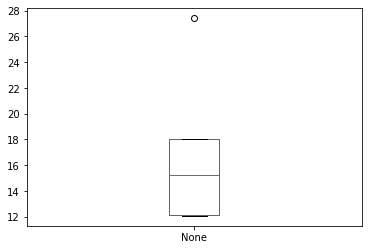

In [94]:
pd.Series([27.40,18.05,17.96,12.45,12.07,12.06]).plot(kind='box')

## измерим расстояние адресов клиентов, обратившихся за АУ с 2018 по 2020гг до БП 20

In [2]:
data_uniq_au = pd.read_excel(r'C:\Users\AmanovRA\Anaconda3\Work-work\Choice_place\Place_Petroga_analysis\Проверить_АУ_БП_20_финал_уник_карты.xlsx')
data_uniq_au.head()

,Номер карты,Пациент,Телефон мобильный,Филиал,Дата рождения,Ф_Полный адрес,Р_Район,Р_МО,Дата приема,Sum([Всего начислено]),Sum([Количество]),Ф_Дом,Ф_Улица,Адрес
0,82,Карелина Юлия Андреевна,+7(921)955-24-83,Б.П. 20,1990-01-05,"197198 г.Санкт-Петербург, ул.Съезжинская",,N 58,2019-11-08,336.0,2,29,ул Съезжинская,Санкт-Петербург ул Съезжинская 29
1,341,Комаров Дэн Анатольевич,+7(931)311-76-61,Б.П. 20,1993-03-06,"г.Санкт-Петербург, пр-кт.Энгельса",,Чкаловское,2018-05-24,1700.0,1,12,пр-кт Динамо,Санкт-Петербург пр-кт Динамо 12
2,457,Калуженов Владимир Михайлович,+7(921)933-03-10,Б.П. 20,1949-02-01,"197101 г.Санкт-Петербург, ул.Кронверкская",,Кронверкское,2019-10-21,1750.0,2,29,ул Кронверкская,Санкт-Петербург ул Кронверкская 29
3,613,Макарова Римма Павловна,+7(921)445-27-89,Б.П. 20,1945-12-05,"197110 г.Санкт-Петербург, ул.Разночинная Б.",,Чкаловское,2018-04-02,2476.0,9,19,ул Большая Разночинная,Санкт-Петербург ул Большая Разночинная 19
4,633,Френкель Борис Натанович,+7(921)941-38-68,Б.П. 20,1939-09-08,"г.Санкт-Петербург, ул.Красного Курсанта",,Петровский,2018-01-30,1530.0,1,7,ул Красного Курсанта,Санкт-Петербург ул Красного Курсанта 7


In [3]:
temp_coords = []
for adress in data_uniq_au['Адрес']:
    try:
        temp_coords.append(addr(adress))
    except:
        temp_coords.append('')

In [4]:
def join_list(lst):
    return ', '.join([str(i) for i in lst])



In [6]:
data_uniq_au['Координаты'] = temp_coords
data_uniq_au['Координаты'] = data_uniq_au['Координаты'].apply(join_list)

In [9]:
bp20 = '59.957827, 30.300848'

In [10]:
from geopy.distance import geodesic
print(geodesic(data_uniq_au['Координаты'][0], bp20).meters)

440.11691409300863


In [19]:
data_uniq_au['Расстояние_до_БП20'] = data_uniq_au['Координаты'].apply(lambda x: geodesic(x, bp20).meters)

In [22]:
data_uniq_au = data_uniq_au.sort_values('Расстояние_до_БП20', ascending=False)

In [23]:
data_uniq_au

,Номер карты,Пациент,Телефон мобильный,Филиал,Дата рождения,Ф_Полный адрес,Р_Район,Р_МО,Дата приема,Sum([Всего начислено]),Sum([Количество]),Ф_Дом,Ф_Улица,Адрес,Координаты,Расстояние_до_БП20
20,8714,Смирнова Анна Андреевна,+7(905)286-05-45,Б.П. 20,1992-04-04,"188652 обл.Ленинградская, ул.Песочная",,Чкаловское,2020-04-01,1920.0,2,16,ул Песочная,188652 обл.Ленинградская ул Песочная 16,"37.273972, -4.229179",3.509881e+06
266,140911,Ковалева Наталья Васильевна,+7(911)136-84-94,Б.П. 20,1977-09-26,"188689 обл.Ленинградская, ул.Новая",,Петровский,2018-09-18,1700.0,1,31-33,ул Гатчинская,"188689 обл.Ленинградская, ул.Новая ул Гатчинск...","37.273972, -4.229179",3.509881e+06
2277,120296245,Коростелёв Леонид Григорьевич,+7(953)357-34-05,Б.П. 20,2012-10-05,-,,Петровский,2020-02-01,500.0,2,146,ул Почтовая,Санкт-Петербург ул Почтовая 146,"60.187347, 29.520859",5.039695e+04
3178,120536414,Радкевич Алеся Леонидовна,+7(911)921-27-58,Б.П. 20,1981-07-30,-,,N 60,2019-07-21,2850.0,2,22,ул Красных Курсантов (Сергиево),Санкт-Петербург ул Красных Курсантов (Сергиево...,"59.695026, 30.115023",3.107850e+04
2409,120333319,Шеротюк Ксения Владимировна,+7(911)978-20-75,Б.П. 20,1989-08-18,-,,N 58,2018-04-13,2500.0,1,3,пл Привокзальная,Санкт-Петербург пл Привокзальная 3,"59.692815, 30.432389",3.043284e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3305,120558218,Васильева Елена Михайловна,+7(905)215-26-89,Б.П. 20,1983-01-27,-,,Кронверкское,2018-06-09,680.0,1,29,пр-кт Большой П.С.,Санкт-Петербург пр-кт Большой П.С. 29,"59.957895, 30.299788",5.970581e+01
3388,120569666,Трифоненко Елена Борисовна,+7(921)905-38-36,Б.П. 20,1983-07-17,-,,Кронверкское,2019-04-18,2500.0,1,20,ул Большая Пушкарская,Санкт-Петербург ул Большая Пушкарская 20,"59.957827, 30.300848",0.000000e+00
706,100035419,Наумова София Дмитриевна,+7(911)240-50-02,Б.П. 20,2017-12-28,-,,Кронверкское,2018-05-13,1250.0,1,20/34,ул Большая Пушкарская,Санкт-Петербург ул Большая Пушкарская 20/34,"59.957827, 30.300848",0.000000e+00
3531,230001472,Король Ирина Михайловна,+7(921)886-89-60,Б.П. 20,1960-05-05,-,,Кронверкское,2019-05-04,3100.0,2,20,ул Большая Пушкарская,Санкт-Петербург ул Большая Пушкарская 20,"59.957827, 30.300848",0.000000e+00


In [24]:
import numpy as np
import pandas as pd
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

outliers = detect_outlier(data_uniq_au['Расстояние_до_БП20'])

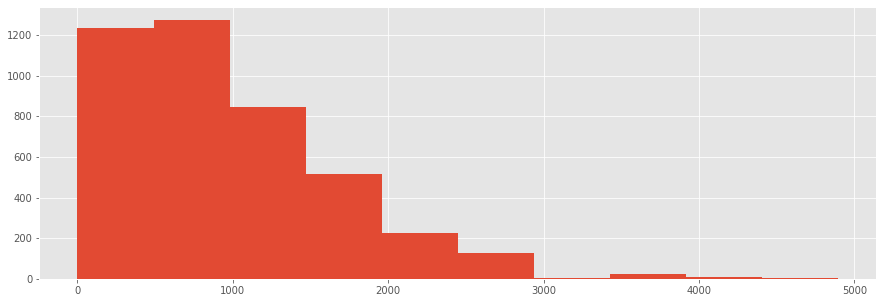

In [40]:
data_uniq_au[data_uniq_au['Расстояние_до_БП20']<5000]['Расстояние_до_БП20'].hist()

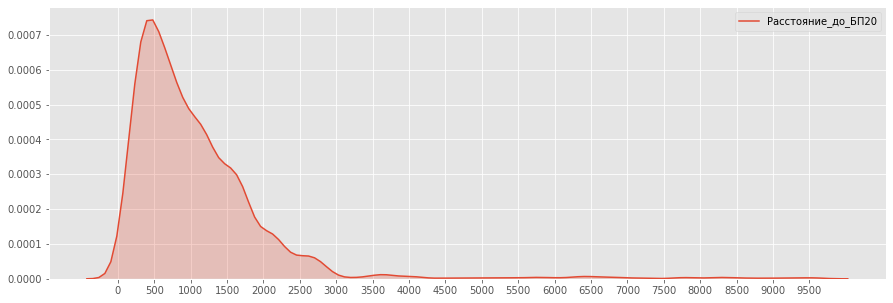

In [66]:
import matplotlib.pyplot as plt


plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок
plt.xticks(range(0, 10000, 500))

import seaborn as sns
snsplot = sns.kdeplot(data_uniq_au[data_uniq_au['Расстояние_до_БП20']<10000]['Расстояние_до_БП20'], shade=True)

fig = snsplot.get_figure()

In [38]:
data_uniq_au[data_uniq_au['Расстояние_до_БП20']<1000]

,Номер карты,Пациент,Телефон мобильный,Филиал,Дата рождения,Ф_Полный адрес,Р_Район,Р_МО,Дата приема,Sum([Всего начислено]),Sum([Количество]),Ф_Дом,Ф_Улица,Адрес,Координаты,Расстояние_до_БП20
2192,120266507,Рогачевская Александра Антоновна,+7(911)728-87-00,Б.П. 20,2014-03-20,-,,Аптекарский Остров,2018-03-25,4190.0,7,3,ул Всеволода Вишневского,Санкт-Петербург ул Всеволода Вишневского 3,"59.966656, 30.303741",996.841468
3703,230004212,Рогачевская Ирина Юрьевна,+7(911)728-87-00,Б.П. 20,1986-01-19,-,,Аптекарский Остров,2018-11-03,1190.0,2,3,ул Всеволода Вишневского,Санкт-Петербург ул Всеволода Вишневского 3,"59.966656, 30.303741",996.841468
1951,120184003,Богдашова Дарья Максимовна,+7(911)093-10-23,Б.П. 20,1995-11-10,-,,Чкаловское,2019-07-08,3580.0,6,3,пр-кт Левашовский,Санкт-Петербург пр-кт Левашовский 3,"59.966493, 30.297228",986.444595
598,100022095,Волкова Мария Андреевна,+7(911)258-44-12,Б.П. 20,1992-12-23,-,,Чкаловское,2019-09-03,1275.0,1,3,пр-кт Левашовский,Санкт-Петербург пр-кт Левашовский 3,"59.966493, 30.297228",986.444595
1857,120141576,Москалева Ольга Анатольевна,+7(911)278-90-99,Б.П. 20,1975-12-11,-,,Чкаловское,2018-09-11,1875.0,1,2,ул Лодейнопольская,Санкт-Петербург ул Лодейнопольская 2,"59.96412, 30.288559",981.268791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3305,120558218,Васильева Елена Михайловна,+7(905)215-26-89,Б.П. 20,1983-01-27,-,,Кронверкское,2018-06-09,680.0,1,29,пр-кт Большой П.С.,Санкт-Петербург пр-кт Большой П.С. 29,"59.957895, 30.299788",59.705809
3388,120569666,Трифоненко Елена Борисовна,+7(921)905-38-36,Б.П. 20,1983-07-17,-,,Кронверкское,2019-04-18,2500.0,1,20,ул Большая Пушкарская,Санкт-Петербург ул Большая Пушкарская 20,"59.957827, 30.300848",0.000000
706,100035419,Наумова София Дмитриевна,+7(911)240-50-02,Б.П. 20,2017-12-28,-,,Кронверкское,2018-05-13,1250.0,1,20/34,ул Большая Пушкарская,Санкт-Петербург ул Большая Пушкарская 20/34,"59.957827, 30.300848",0.000000
3531,230001472,Король Ирина Михайловна,+7(921)886-89-60,Б.П. 20,1960-05-05,-,,Кронверкское,2019-05-04,3100.0,2,20,ул Большая Пушкарская,Санкт-Петербург ул Большая Пушкарская 20,"59.957827, 30.300848",0.000000


In [50]:
data_uniq_au['Расстояние_до_БП20'].quantile(0.8)

1597.679837393559

In [89]:
temp_arr = []
for i, j in enumerate(data_uniq_au['Расстояние_до_БП20']):
    for x in range(data_uniq_au['Sum([Количество])'][i]):
        temp_arr.append(j)
temp_arr = [i for i in temp_arr if i < 10000]

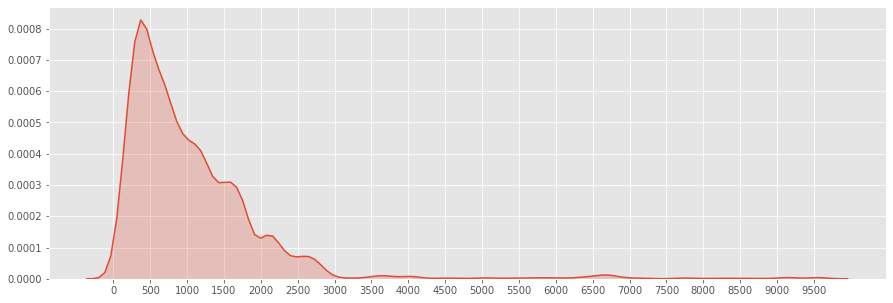

In [90]:
import matplotlib.pyplot as plt


plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок
plt.xticks(range(0, 10000, 500))

import seaborn as sns
snsplot = sns.kdeplot(temp_arr, shade=True)

fig = snsplot.get_figure()

In [91]:
temp_arr

[9600.65607947365,
 9564.736826163877,
 9564.736826163877,
 9564.736826163877,
 9558.57234203244,
 9558.57234203244,
 9558.57234203244,
 9558.57234203244,
 9558.57234203244,
 9558.57234203244,
 9558.57234203244,
 9463.34404911892,
 9341.2666536458,
 9242.36125681543,
 9242.36125681543,
 9152.969340371448,
 9152.969340371448,
 9152.969340371448,
 9152.969340371448,
 9152.969340371448,
 9152.969340371448,
 9152.969340371448,
 9152.969340371448,
 9078.197003143734,
 9078.197003143734,
 9078.197003143734,
 8900.85006481939,
 8782.143334199583,
 8782.143334199583,
 8637.98551165622,
 8494.753910020847,
 8494.753910020847,
 8485.777622060541,
 8384.931279746832,
 8285.008609226663,
 8284.261263011693,
 8224.88308289956,
 8202.276855603923,
 8124.980877793901,
 7882.773149655903,
 7882.773149655903,
 7882.696962519379,
 7786.047608096602,
 7754.186330530544,
 7716.868123223516,
 7716.868123223516,
 7716.868123223516,
 7716.868123223516,
 7675.096792743068,
 7296.049217944956,
 7150.8897495938